# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of ciudades

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the ciudades based on latitude and longitude
from citipy import citipy

### Generate the ciudades List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
latitud_ln = []

# Empty list for holding the ciudades names
ciudades = []

# Range of latitudes and longitudes
latitude_range = (-90, 90)
longitud_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(latitude_range[0], latitude_range[1], size=1500)
lngs = np.random.uniform(longitud_range[0], longitud_range[1], size=1500)
latitud_ln = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in latitud_ln:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our ciudades list
    if city not in ciudades:
        ciudades.append(city)

# Print the city count to confirm sufficient count
print(f"Number of ciudades in the list: {len(ciudades)}")

Number of ciudades in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the ciudades list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
citi_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
setting_count = 1

# Loop through all the ciudades in our list to fetch weather data
for i, city in enumerate(ciudades):
        
    # Group ciudades in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        setting_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, setting_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the ciudades
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into citi_data list
        citi_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | inuvik
Processing Record 2 of Set 1 | vaitape
Processing Record 3 of Set 1 | ejura
Processing Record 4 of Set 1 | swellendam
Processing Record 5 of Set 1 | esperance
Processing Record 6 of Set 1 | hoquiam
Processing Record 7 of Set 1 | necochea
Processing Record 8 of Set 1 | georgetown
Processing Record 9 of Set 1 | okhotsk
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | butaritari
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | leh
Processing Record 14 of Set 1 | shelburne
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 17 of Set 1 | wanning
Processing Record 18 of Set 1 | sao joao da barra
Processing Record 19 of Set 1 | fort frances
Processing Record 20 of Set 1 | rawson
Processing Record 21 of Set 1 | yegorlykskaya
Processing Record 22 of Set 1 | rabat
Processing Reco

In [4]:
# Convert the cities weather data into a Pandas DataFrame
citi_data_df = pd.DataFrame(citi_data)

# Show Record Count
citi_data_df.count()

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [5]:
# Display sample data
citi_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,inuvik,68.3499,-133.7218,-23.52,77,100,4.12,CA,1678724369
1,vaitape,-16.5167,-151.7500,27.64,75,100,4.36,PF,1678724369
2,ejura,7.3856,-1.3562,36.03,28,64,1.05,GH,1678724189
3,swellendam,-34.0226,20.4417,25.03,53,0,4.16,ZA,1678724370
4,esperance,-33.8667,121.9000,19.10,88,77,3.58,AU,1678724370


In [6]:
# Export the cities_data into a csv
citi_data_df.to_csv("output_data/ciudades.csv", index_label="City_ID")

In [7]:
# Read saved data
citi_data_df = pd.read_csv("output_data/ciudades.csv", index_col="City_ID")

# Display sample data
citi_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,inuvik,68.3499,-133.7218,-23.52,77,100,4.12,CA,1678724369
1,vaitape,-16.5167,-151.7500,27.64,75,100,4.36,PF,1678724369
2,ejura,7.3856,-1.3562,36.03,28,64,1.05,GH,1678724189
3,swellendam,-34.0226,20.4417,25.03,53,0,4.16,ZA,1678724370
4,esperance,-33.8667,121.9000,19.10,88,77,3.58,AU,1678724370


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

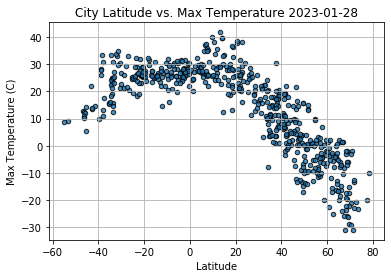

In [8]:
# Build scatter plot for latitude vs. temperature
ax1 = citi_data_df.plot.scatter(x='Lat', y='Max Temp',edgecolor='black',alpha=0.8, marker='o')

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature 2023-01-28")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

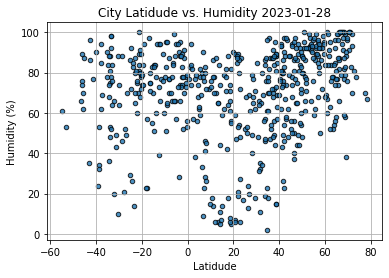

In [9]:
# Build the scatter plots for latitude vs. humidity
ax1 = citi_data_df.plot.scatter(
    x='Lat', y='Humidity', edgecolor='black', alpha=0.8, marker='o')


# Incorporate the other graph properties
plt.title("City Latidude vs. Humidity 2023-01-28")
plt.ylabel("Humidity (%)")
plt.xlabel("Latidude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

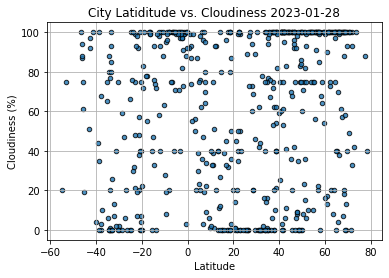

In [10]:
# Build the scatter plots for latitude vs. cloudiness
ax1 = citi_data_df.plot.scatter(
    x='Lat', y='Cloudiness', edgecolor='black', alpha=0.8, marker='o')

# Incorporate the other graph properties
plt.title("City Latiditude vs. Cloudiness 2023-01-28")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

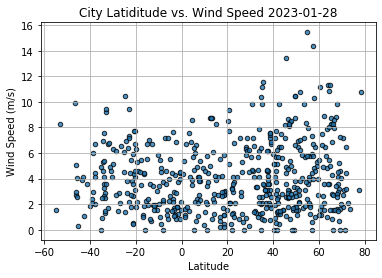

In [11]:
# Build the scatter plots for latitude vs. wind speed
ax1 = citi_data_df.plot.scatter(
    x='Lat', y='Wind Speed', edgecolor='black', alpha=0.8, marker='o')

# Incorporate the other graph properties
plt.title("City Latiditude vs. Wind Speed 2023-01-28")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_df = citi_data_df.loc[(citi_data_df["Lat"] >= 0)]

# Display sample data
north_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,inuvik,68.3499,-133.7218,-23.52,77,100,4.12,CA,1678724369
2,ejura,7.3856,-1.3562,36.03,28,64,1.05,GH,1678724189
5,hoquiam,46.9809,-123.8893,6.27,97,100,3.02,US,1678724264
7,georgetown,5.4112,100.3354,26.96,78,20,0.00,MY,1678724148
8,okhotsk,59.3833,143.3000,-7.46,95,100,4.96,RU,1678724371


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south_df = citi_data_df.loc[(citi_data_df["Lat"] < 0)]

# Display sample data
south_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,vaitape,-16.5167,-151.7500,27.64,75,100,4.36,PF,1678724369
3,swellendam,-34.0226,20.4417,25.03,53,0,4.16,ZA,1678724370
4,esperance,-33.8667,121.9000,19.10,88,77,3.58,AU,1678724370
6,necochea,-38.5473,-58.7368,33.63,34,35,6.01,AR,1678724371
9,atuona,-9.8000,-139.0333,26.03,78,28,3.44,PF,1678724371


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7821156727448333


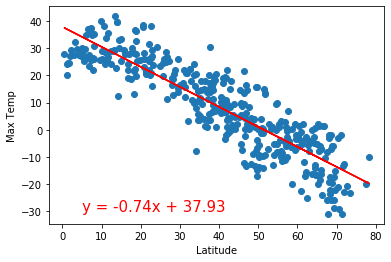

In [15]:
# Linear regression on Northern Hemisphere
x_values = north_df["Lat"]
y_values = north_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(5,-30))

The r-value is: 0.2756731653583029


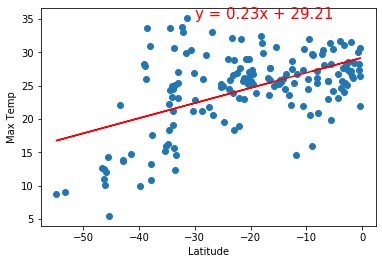

In [16]:
# Linear regression on Southern Hemisphere
x_values = south_df["Lat"]
y_values = south_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(-30,35))

**Discussion about the linear relationship:** There is a strong correlation between latitude and temperature in the north hemisphere. In the south hemisphere, on the other hand, the temperature is little affected by the elevation of the studied ciudades.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.18073430755981046


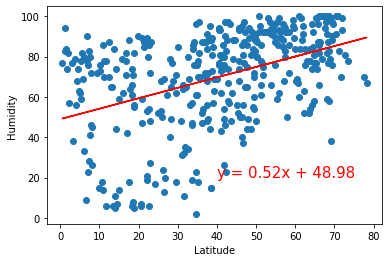

In [17]:
# Northern Hemisphere
x_values = north_df["Lat"]
y_values = north_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,20))

The r-value is: 0.029685838938728407


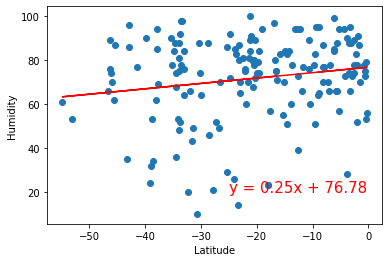

In [18]:
# Southern Hemisphere
x_values = south_df["Lat"]
y_values = south_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(-25,20))

**Discussion about the linear relationship:** Following the trend on temperature, the correlation between humidity and latitute is higher in the north hemisphere, but on an much smaller rate than the temperature. Both hemispheres have a weak correlation Humidity vs Latitute.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.06696835269658327


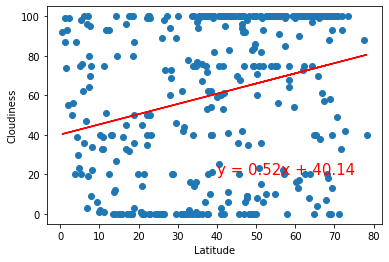

In [19]:
# Northern Hemisphere
x_values = north_df["Lat"]
y_values = north_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness',(40,20))

The r-value is: 0.15039724986848466


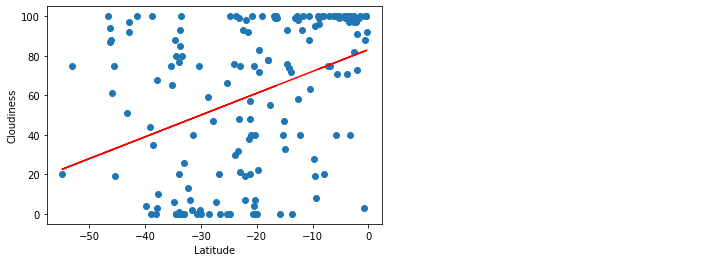

In [20]:
# Southern Hemisphere
x_values = south_df["Lat"]
y_values = south_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness',(40,20))

**Discussion about the linear relationship:** While there is some correlation between cloudiness and latitude in the north hemisphere, it is almost inexistent in the south hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.017155964155228166


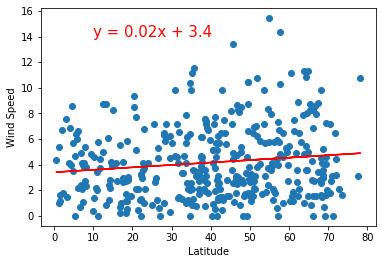

In [21]:
# Northern Hemisphere
x_values = north_df["Lat"]
y_values = north_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed',(10,14))

The r-value is: 0.039460034050383154


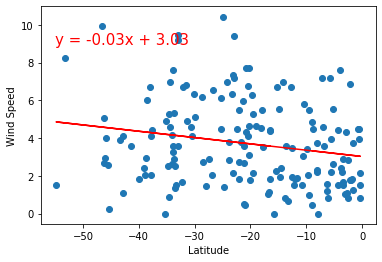

In [22]:
# Southern Hemisphere
x_values = south_df["Lat"]
y_values = south_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed',(-55,9))

**Discussion about the linear relationship:** No correlation between wind speed and latituted on both hemispheres.